In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
import datetime as dt
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"
cities_df= pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
lat = []
lng = []
temp = []
humidity = []
cloud = []
date = []
place_city = []
place_country =[]
temp_min = []
temp_max = []
wind_speed= []
y=1

# Check to see the URL works
response= requests.get(query_url + city)
print(response)


places_data = response.json()
print(json.dumps(places_data, indent=4, sort_keys=True))


<Response [200]>
{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": -2.02,
        "lon": 147.27
    },
    "dt": 1584319859,
    "id": 2092164,
    "main": {
        "feels_like": 90.23,
        "grnd_level": 1012,
        "humidity": 72,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 84.09,
        "temp_max": 84.09,
        "temp_min": 84.09
    },
    "name": "Lorengau",
    "rain": {
        "3h": 0.13
    },
    "sys": {
        "country": "PG",
        "sunrise": 1584303363,
        "sunset": 1584346991
    },
    "timezone": 36000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 217,
        "speed": 6.53
    }
}


In [5]:
# #Define function for date
# date=[]
# for city in date:
#     date_test=city
#     date_conversion=time.gmtime(date_test)
#     date_format=time.strftime('%m/%d/%Y',date_conversion)
#     dates.append(date_format)

In [6]:
# Beginning of the log:
print("Beginning Data Retrieval")
print("-------------------------")

# Loop through the list of cities and perform a request for data on each. Add to log

for city in cities:
    target_url = query_url + city
    response = requests.get(target_url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        temp_min.append(response['main']['temp_min'])
        date.append(response['dt'])
        place_city.append(city)
        place_country.append(response['sys']['country'])
        print (f"Processing Record {y} | {city} ")
    except KeyError:
        print(f"City not found. Skipping...")
        y=y-1
        pass
    y+=1
# End of Data log:
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")




# # use iterrows to iterate through pandas dataframe
# for index, row in types_df.iterrows():

#     # get restaurant type from df
#     restr_type = row['ethnicity']

#     # add keyword to params dict
#     params['keyword'] = restr_type

#     # assemble url and make API request
#     print(f"Retrieving Results for Index {index}: {restr_type}.")
#     response = requests.get(base_url, params=params).json()
    
#     # extract results
#     results = response['results']
    
#     try:
#         print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
#         types_df.loc[index, 'name'] = results[0]['name']
#         types_df.loc[index, 'address'] = results[0]['vicinity']
#         types_df.loc[index, 'price_level'] = results[0]['price_level']
#         types_df.loc[index, 'rating'] = results[0]['rating']
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
        
#     print("------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 | punta arenas 
Processing Record 2 | quilali 
Processing Record 3 | coihaique 
Processing Record 4 | thompson 
Processing Record 5 | jamestown 
City not found. Skipping...
Processing Record 6 | puerto ayora 
Processing Record 7 | general roca 
Processing Record 8 | vijayawada 
Processing Record 9 | ovalle 
Processing Record 10 | bubaque 
City not found. Skipping...
Processing Record 11 | dikson 
Processing Record 12 | rikitea 
Processing Record 13 | faanui 
City not found. Skipping...
Processing Record 14 | saskylakh 
Processing Record 15 | havoysund 
Processing Record 16 | vaini 
Processing Record 17 | bredasdorp 
Processing Record 18 | qaanaaq 
Processing Record 19 | atuona 
Processing Record 20 | souillac 
Processing Record 21 | cape town 
Processing Record 22 | barrow 
Processing Record 23 | boyle 
Processing Record 24 | airai 
Processing Record 25 | luderitz 
Processing Record 26 | ushuaia 
City not found. Ski

Processing Record 218 | kyzyl-suu 
City not found. Skipping...
Processing Record 219 | nuuk 
Processing Record 220 | zaysan 
Processing Record 221 | fort nelson 
Processing Record 222 | narsaq 
Processing Record 223 | yumen 
Processing Record 224 | paharpur 
Processing Record 225 | phulabani 
Processing Record 226 | salalah 
Processing Record 227 | vernon 
Processing Record 228 | seguin 
Processing Record 229 | marzuq 
Processing Record 230 | imuris 
Processing Record 231 | tukrah 
Processing Record 232 | bambanglipuro 
Processing Record 233 | umm lajj 
Processing Record 234 | nisia floresta 
Processing Record 235 | saint-pierre 
Processing Record 236 | saint-joseph 
Processing Record 237 | naze 
Processing Record 238 | verkhoyansk 
Processing Record 239 | coruripe 
Processing Record 240 | poum 
Processing Record 241 | coos bay 
Processing Record 242 | upernavik 
Processing Record 243 | koungheul 
Processing Record 244 | san sebastian villanueva 
Processing Record 245 | sanandaj 
Proce

Processing Record 442 | long 
Processing Record 443 | ihiala 
Processing Record 444 | khorixas 
Processing Record 445 | alexandria 
Processing Record 446 | port augusta 
Processing Record 447 | urdoma 
Processing Record 448 | shamkhal 
Processing Record 449 | aksarka 
Processing Record 450 | gospic 
Processing Record 451 | casa grande 
City not found. Skipping...
Processing Record 452 | manzil salim 
Processing Record 453 | saint anthony 
Processing Record 454 | baillif 
Processing Record 455 | uige 
City not found. Skipping...
Processing Record 456 | pestravka 
Processing Record 457 | colares 
City not found. Skipping...
Processing Record 458 | the valley 
Processing Record 459 | verkhnyaya inta 
Processing Record 460 | olinda 
Processing Record 461 | san luis 
Processing Record 462 | faya 
Processing Record 463 | pathein 
Processing Record 464 | yerbogachen 
Processing Record 465 | port lincoln 
Processing Record 466 | san luis de planes 
Processing Record 467 | cochrane 
Processing 

# Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [7]:
#Create a Dataframe
weather_df= {"City": place_city, 
             "Cloudiness": cloud, 
             "Country": place_country, 
             "Date": date, 
             "Humidity": humidity, 
             "Lat": lat,
             "Lng": lng,
             "Max Temp": temp_max, 
             "Wind Speed": wind_speed}
weather_df= pd.DataFrame(weather_df)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75,CL,1584320072,76,-53.15,-70.92,57.20,14.99
1,quilali,20,NI,1584320072,62,13.57,-86.03,73.76,5.91
2,coihaique,75,CL,1584319882,63,-45.58,-72.07,60.80,5.82
3,thompson,90,CA,1584319867,62,55.74,-97.86,19.40,11.41
4,jamestown,1,US,1584320070,71,42.10,-79.24,35.60,8.05


# Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

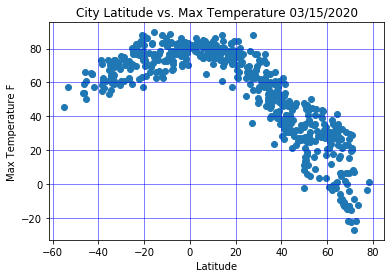

In [8]:
# Plot the  scatter plot 
plt.scatter(lat, temp_max)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature F")
plt.title(("City Latitude vs. Max Temperature") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
           
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_maxtemp.png')



The plot here shows that the maximum temperature increases as you get to the equator then decreases the higher you go in latitude or northward        

## Latitude vs. Humidity Plot

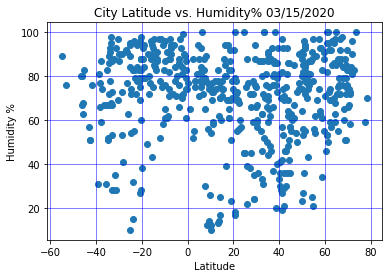

In [9]:
# Plot the  scatter plot 
plt.scatter(lat, humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(("City Latitude vs. Humidity%") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_humidity.png')

This graph shows that there is no correlation between latitude and humidity as humidity seems the same despite the change in latitude.

##  Latitude vs. Cloudiness Plot

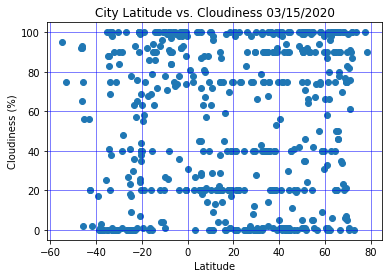

In [10]:
# Plot the  scatter plot 
plt.scatter(lat, cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(("City Latitude vs. Cloudiness") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_cloud.png')

This graph also shows that there is no correlation between cloudiness and latitude. You can notice that cloudiness is typically either extremely high or lowregardless of latitude.

##  Latitude vs. Wind Speed Plot

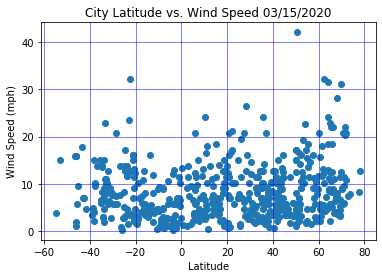

In [11]:
# Plot the  scatter plot 
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(("City Latitude vs. Wind Speed") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_wind.png')

The graph here shows little corelation but it can be observed that the higher you go in latitude a slight increase in wind speed takes place.

# Linear Regression

In [12]:
# Add another dataframe for the Northern Hemisphere
northern_df= weather_df.loc[weather_df["Lat"]>= 0]
northern_lat= northern_df["Lat"]
northern_temp= northern_df["Max Temp"]
northern_hum=northern_df["Humidity"]
northern_wind=northern_df["Wind Speed"]
northern_cloud=northern_df["Cloudiness"]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,quilali,20,NI,1584320072,62,13.57,-86.03,73.76,5.91
3,thompson,90,CA,1584319867,62,55.74,-97.86,19.40,11.41
4,jamestown,1,US,1584320070,71,42.10,-79.24,35.60,8.05
7,vijayawada,4,IN,1584320073,94,16.52,80.62,75.20,3.60
9,bubaque,98,GW,1584320074,59,11.28,-15.83,81.95,18.01
...,...,...,...,...,...,...,...,...,...
540,dalvik,90,IS,1584320151,86,65.97,-18.53,26.60,21.92
543,sisimiut,35,GL,1584320152,88,66.94,-53.67,-11.47,6.38
544,shenxian,100,CN,1584320152,46,36.24,115.67,48.99,14.18
546,mastic beach,1,US,1584320152,28,40.77,-72.85,46.40,8.05


In [13]:
# Add another dataframe for the Southern Hemisphere
southern_df= weather_df.loc[weather_df["Lat"]< 0]
southern_lat= southern_df["Lat"]
southern_temp=southern_df["Max Temp"]
southern_hum=southern_df["Humidity"]
southern_wind=southern_df["Wind Speed"]
southern_cloud=southern_df["Cloudiness"]
southern_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75,CL,1584320072,76,-53.15,-70.92,57.20,14.99
2,coihaique,75,CL,1584319882,63,-45.58,-72.07,60.80,5.82
5,puerto ayora,20,EC,1584320073,74,-0.74,-90.35,82.40,10.29
6,general roca,17,AR,1584320073,31,-39.03,-67.58,73.40,3.36
8,ovalle,0,CL,1584320073,69,-30.60,-71.20,58.68,2.75
...,...,...,...,...,...,...,...,...,...
541,grand baie,40,MU,1584320152,88,-20.02,57.58,75.00,2.24
542,nauta,74,PE,1584320152,80,-4.51,-73.58,79.57,2.66
545,fonte boa,98,BR,1584320152,84,-2.50,-66.27,75.94,0.74
547,fomboni,93,KM,1584320152,78,-12.28,43.74,83.21,11.90


## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.8159


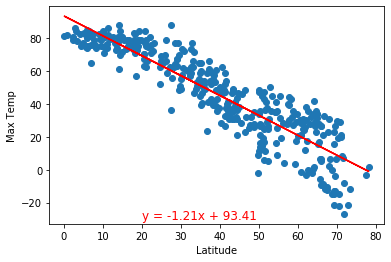

<Figure size 432x288 with 0 Axes>

In [14]:
# Perform a linear regression on latitude and Temperature
slope, int, r, p, std_err = linregress(northern_lat, northern_temp)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_temp)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(20,-30),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../Output/northlatitude_maxtemp.png', dpi=50)

For the northern Hemisphere, there is a strong negative correlation between the maximum temperature and latitude. The higher you go, that is, the more north you go, the lower the maximum temperature.

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4441


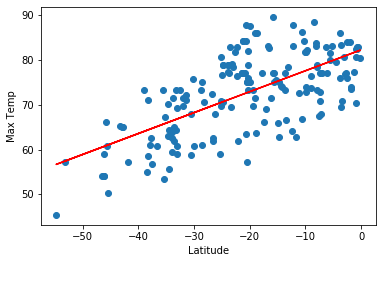

<Figure size 432x288 with 0 Axes>

In [15]:
# Perform a linear regression on latitude and Temperature
slope, int, r, p, std_err = linregress(southern_lat, southern_temp)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_temp)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-45,30),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('../Output/southlatitude_maxtemp.png', dpi=50)

For the southern Hemisphere, there is a strong positive correlation between the maximum temperature and latitude. The higher you go, that is, the more north you go towards the equator, the higher the maximum temperature.

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0329


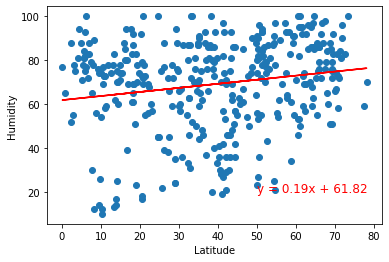

<Figure size 432x288 with 0 Axes>

In [16]:
# Perform a linear regression on latitude and Humidity
slope, int, r, p, std_err = linregress(northern_lat, northern_hum)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_hum)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')

fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('../Output/northlatitude_humidity.png', dpi=50)

For the northern Hemisphere, there is a slight positive correlation between the humidity and latitude. The higher you go in latitude, the humidity increases slightly. 

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0625


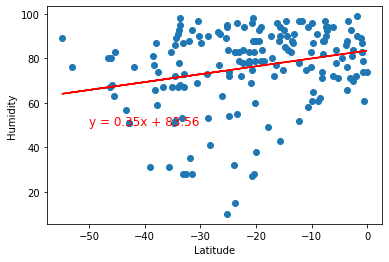

<Figure size 432x288 with 0 Axes>

In [17]:
# Perform a linear regression on latitude and Humidity
slope, int, r, p, std_err = linregress(southern_lat, southern_hum)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_hum)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig('../Output/southlatitude_humidity.png', dpi=50)

For the southern Hemisphere, there is a slight positive correlation between the humidity and latitude. The higher you go, that is, the more north you go, a slight increase takes place.

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.032


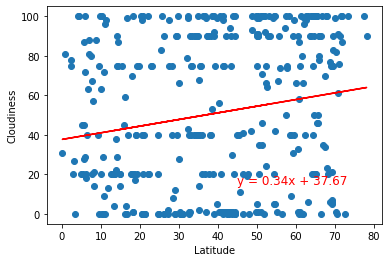

<Figure size 432x288 with 0 Axes>

In [18]:
# Perform a linear regression on latitude and Cloudiness
slope, int, r, p, std_err = linregress(northern_lat, northern_cloud)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_cloud)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(45,15),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')

fig5 = plt.gcf()
plt.show()
plt.draw()
fig5.savefig('../Output/northlatitude_cloudiness.png', dpi=50)

For the northern Hemisphere, there is a very slight positive correlation between the cloudiness and latitude. The higher you go, that is, the more north you go, the higher the cloudiness although only slightly.

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0964


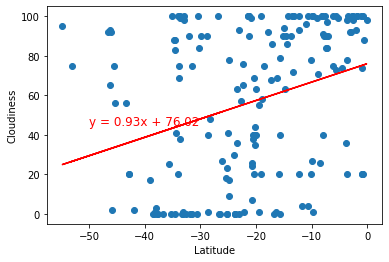

<Figure size 432x288 with 0 Axes>

In [19]:
# Perform a linear regression on latitude and Cloudiness
slope, int, r, p, std_err = linregress(southern_lat, southern_cloud)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_cloud)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-50,45),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig6 = plt.gcf()
plt.show()
plt.draw()
fig6.savefig('../Output/southlatitude_cloudiness.png', dpi= 50)

For the southern Hemisphere, there is a slight positive correlation between the cludiness and latitude. The higher you go, that is, the more north you go, the higher the cloudiness.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0296


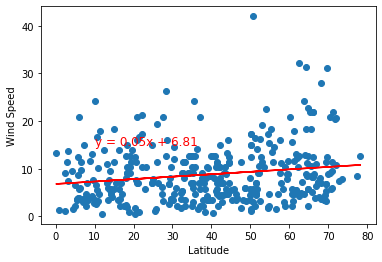

<Figure size 432x288 with 0 Axes>

In [20]:
# Perform a linear regression on latitude and Wind Speed
slope, int, r, p, std_err = linregress(northern_lat, northern_wind)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_wind)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(10,15),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')

fig7 = plt.gcf()
plt.show()
plt.draw()
fig7.savefig('../Output/northlatitude_wind.png', dpi= 50)

For the northern Hemisphere, there is a very slight positive correlation between the windspeed and latitude. The higher you go, that is, the more north you go, the higher the wind speed.

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0872


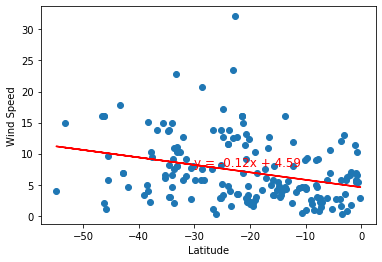

<Figure size 432x288 with 0 Axes>

In [21]:
# Perform a linear regression on latitude and Wind Speed
slope, int, r, p, std_err = linregress(southern_lat, southern_wind)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_wind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-30,8),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig8 = plt.gcf()
plt.show()
plt.draw()
fig8.savefig('../Output/southlatitude_wind.png', dpi= 50)

For the southern Hemisphere, there is a very slight negative correlation between the windspeed and latitude. The higher you go, that is, the more north you go, the lower the wind speed.